In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
import pandas as pd

In [117]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/II колоквиум 2024/text_sentiment.csv')

In [118]:
data

,text,Sentiment
0,Awe-inspired by the grandeur of an ancient cat...,Awe
1,Awe-struck by the grandeur of an ancient cathe...,Awe
2,"Walking the Great Wall of China, each step a t...",Awe
3,Euphoria floods in as the final puzzle piece c...,Euphoria
4,Euphoria floods in as the final puzzle piece f...,Euphoria
...,...,...
727,"In the garden of friendships, each bloom a tes...",Friendship
728,A sense of wonder at the vastness of the cosmo...,Wonder
729,Awe-inspired by the vastness of the cosmos on ...,Wonder
730,"Heartache deepens, a solitary journey through ...",Despair


In [119]:
data.isnull().sum()

text         0
Sentiment    0
dtype: int64

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
encoder = LabelEncoder()

In [122]:
data['Sentiment']= encoder.fit_transform(data['Sentiment'])

In [123]:
data['Sentiment'].nunique()

191

In [124]:
! pip install transformers[torch] datasets evaluate

In [125]:
#Koga koristis gotov model

In [126]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [127]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment', num_labels=5)

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data['text'],data['Sentiment'],test_size=0.2)

In [129]:
df_train = pd.concat([X_train,Y_train],axis=1)
df_test= pd.concat([X_test,Y_test],axis=1)
df_train.columns = ['text','label']
df_test.columns = ['text','label']
df_train.to_csv('train.csv',index=False)
df_test.to_csv('test.csv',index=False)

In [130]:
from datasets import load_dataset

In [131]:
dataset = load_dataset("csv", data_files={"train": "train.csv", "test": "test.csv"})

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [132]:
encoded_dataset = dataset.map(lambda t: tokenizer(t['text'], truncation=True), batched=True,load_from_cache_file=False)

Map:   0%|          | 0/585 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

In [133]:
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment',num_labels =191,ignore_mismatched_sizes=True)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([191, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([191]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [134]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 585
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 147
    })
})

In [135]:
from transformers import TrainingArguments, Trainer

In [136]:
arg = TrainingArguments( "sentiment", learning_rate=5e-5, num_train_epochs=1, per_device_eval_batch_size=16, per_device_train_batch_size=16, seed=19 )

In [137]:
trainer = Trainer( model=model, args=arg, tokenizer=tokenizer, train_dataset=encoded_dataset['train'], eval_dataset=encoded_dataset['test'] )

In [138]:
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


TrainOutput(global_step=37, training_loss=5.064431680215372, metrics={'train_runtime': 289.4535, 'train_samples_per_second': 2.021, 'train_steps_per_second': 0.128, 'total_flos': 10743573199446.0, 'train_loss': 5.064431680215372, 'epoch': 1.0})

In [ ]:
#Za fit na modelot
y_pred = trainer.predict(encoded_dataset['test'])

In [ ]:
y_pred = y_pred.predictions

In [ ]:
import numpy as np

In [ ]:
y_pred = [np.argmax(y_pred[i]) for i in range(0,len(y_pred))]

In [ ]:
from sklearn.metrics import classification_report,f1_score

In [ ]:
f1_score(df_test['label'],y_pred,average='macro')

0.010946907498631636

Nevronska mreza

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/II колоквиум 2024/text_sentiment.csv')

In [ ]:
data2['text_length'] = data2['text'].apply(len)

<Axes: ylabel='Frequency'>

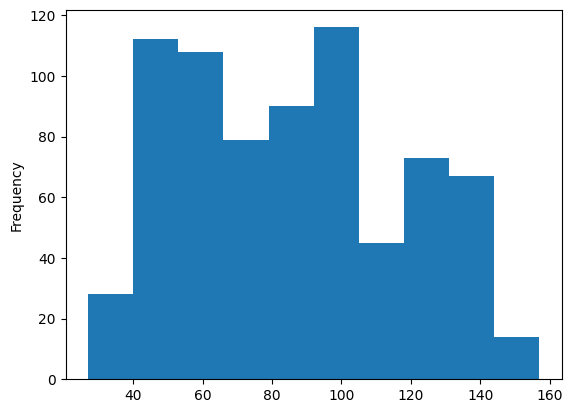

In [ ]:
data2['text_length'].plot.hist()

In [ ]:
X = data['text']
Y = pd.get_dummies(data['Sentiment'])

In [ ]:
len(Y.columns) #ova e za num_classes

191

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.2)

In [ ]:
data2['num_words'] = data['text'].apply(lambda x: len(x.split(" ")))

<Axes: ylabel='Frequency'>

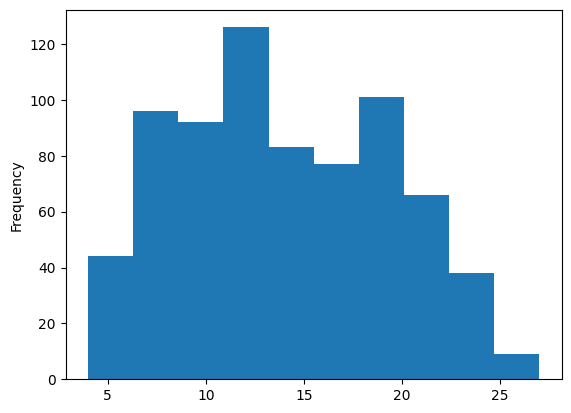

In [ ]:
data2['num_words'].plot.hist()

In [ ]:
max_tokens = 20

In [ ]:
tokenizer2 = Tokenizer(num_words=max_tokens)
tokenizer2.fit_on_texts(X_train2.values)
X_train2 = tokenizer2.texts_to_sequences(X_train2)
X_test2 = tokenizer2.texts_to_sequences(X_test2)

In [ ]:
len_tokens = [len(token_list) for token_list in X_train2]

(array([45., 86., 81., 92., 65., 78., 52., 54., 22., 10.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

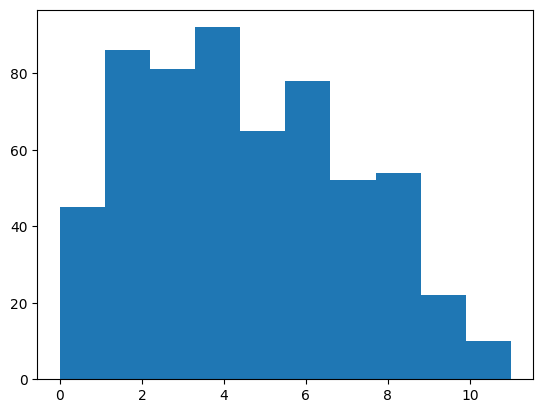

In [ ]:
plt.hist(len_tokens)

In [ ]:
maxlen=6

In [ ]:
X_train2 = sequence.pad_sequences(X_train2, maxlen=maxlen)
X_test2 = sequence.pad_sequences(X_test2, maxlen=maxlen)

In [ ]:
X_train.shape, X_test.shape

((585,), (147,))

In [ ]:
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
model = Sequential()
model.add(Embedding(max_tokens, 32, input_length=X_train2.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(191, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
history = model.fit(X_train2, Y_train2, validation_split=0.2, batch_size=64, epochs=10)

Epoch 1/10
8/8 [==============================] - 4s 87ms/step - loss: 5.2503 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 5.2471 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 0s 15ms/step - loss: 5.2401 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 5.2379 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 0s 16ms/step - loss: 5.2218 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 5.2168 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 0s 14ms/step - loss: 5.1763 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 5.1586 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 0s 15ms/step - loss: 5.0449 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 5.0179 - val_precision_5: 0.0000e+00 - val_recall

In [ ]:
preds = model.predict(X_test2)

5/5 [==============================] - 0s 6ms/step


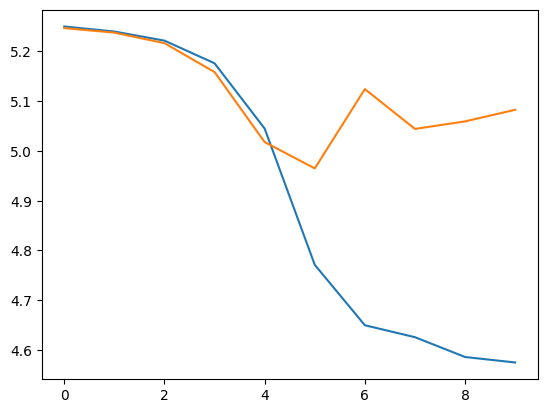

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

In [ ]:
confmat = confusion_matrix(np.argmax(Y_test2.values, axis=1), np.argmax(preds, axis=1))
sns.heatmap(confmat, annot=True, cmap='Blues', fmt='5.2f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
print(classification_report(np.argmax(Y_test2.values, axis=1), np.argmax(preds, axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         1
          40       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
